<a href="https://colab.research.google.com/github/FranziskoB/Analise_Fatorial_PCA/blob/main/Py_Analise_Fatorial_PCA_Exemplo1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análises fatoriais e PCA

Utilizando uma base de dados de notas de alunos, o objetivo da análise é criar um ranking desses alunos.



##Importando bibliotecas

In [ ]:
!pip install spicy
!pip install factor_analyzer
!pip install pingouin

In [5]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Carregamento da base de dados

In [25]:
notas = pd.read_excel("https://github.com/FranziskoB/Analise_Fatorial_PCA/raw/main/Dados/notas_fatorial.xlsx")
notas.head(5)

,estudante,finanças,custos,marketing,atuária
0,Gabriela,5.8,4.0,1.0,6.0
1,Luiz Felipe,3.1,3.0,10.0,2.0
2,Patrícia,3.1,4.0,4.0,4.0
3,Gustavo,10.0,8.0,8.0,8.0
4,Letícia,3.4,2.0,3.2,3.2


##Informações sobre as variáveis

In [8]:
print(notas.info())
print(notas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   finanças   100 non-null    float64
 2   custos     100 non-null    float64
 3   marketing  100 non-null    float64
 4   atuária    100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB
None
         finanças      custos   marketing     atuária
count  100.000000  100.000000  100.000000  100.000000
mean     5.834000    4.717000    5.668000    5.314000
std      3.122749    2.455999    2.828351    2.513078
min      0.600000    1.900000    1.000000    1.700000
25%      3.100000    2.900000    3.000000    3.200000
50%      5.800000    4.000000    6.000000    5.000000
75%      9.000000    6.000000    8.000000    7.025000
max     10.000000   10.000000   10.000000   10.000000


##Matriz de correlaçãoes

In [10]:
notas_pca = notas[["finanças", "custos", "marketing", "atuária"]]
matriz_corr = pg.rcorr(notas_pca, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
print(matriz_corr)

          finanças  custos marketing atuária
finanças         -     ***               ***
custos      0.7556       -               ***
marketing  -0.0295  0.0029         -        
atuária     0.7109  0.8081   -0.0443       -


outra maneira de plotar as mesmas informações

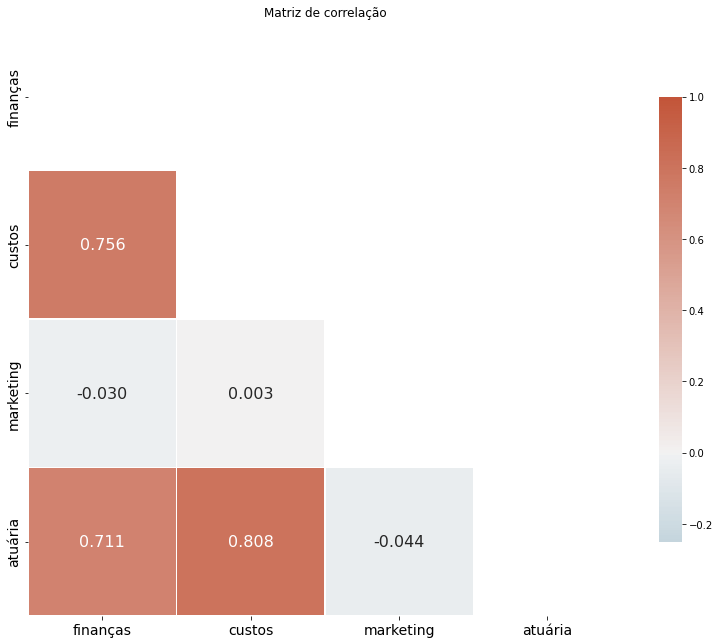

In [11]:
corr = notas_pca.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(notas.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

##Teste de Bartlett

In [12]:
bartlett, p_value = calculate_bartlett_sphericity(notas_pca)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 191.87909970380863
p-value : 1.0139139940945954e-38


##PCA

Definindo a PCA (procedimento preliminar)

In [13]:
fa = FactorAnalyzer()
fa.fit(notas_pca)

FactorAnalyzer(rotation_kwargs={})

Obtendo os Eigenvalues (autovalores)

In [14]:
ev, v = fa.get_eigenvalues()
print(ev)# Temos 4 autovalores para este exemplo, pois são 4 variáveis

[2.51812681 1.0003793  0.29761585 0.18387804]


Critério de Kaiser : 
* Verificar autovalores com valores maiores que 1
* Existem dois componentes acima de 1

Parametrizando a PCA para dois fatores (autovalores > 1)


In [15]:
fa.set_params(n_factors = 2, method = 'principal', rotation = None)
fa.fit(notas_pca)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

Eigenvalues, variâncias e variâncias acumulada


In [18]:
eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T
print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.518127   0.629532             0.629532
Fator 2   1.000379   0.250095             0.879627


Determinando as cargas fatoriais

In [19]:
cargas_fatores = fa.loadings_
tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = notas_pca.columns
tabela_cargas
print(tabela_cargas)

            Fator 1   Fator 2
finanças   0.895398  0.007086
custos     0.934033  0.048581
marketing -0.042466  0.998933
atuária    0.917697 -0.010133


Determinando as comunalidades

In [20]:
comunalidades = fa.get_communalities()
tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = notas_pca.columns
tabela_comunalidades
print(tabela_comunalidades)

           Comunalidades
finanças        0.801788
custos          0.874778
marketing       0.999670
atuária         0.842271


Resultados dos fatores para as observações do dataset (predict)

In [21]:
predict_fatores= pd.DataFrame(fa.transform(notas_pca))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]
print(predict_fatores)

     Fator 1   Fator 2
0   0.015232 -1.673452
1  -1.082468  1.510196
2  -0.603231 -0.607015
3   1.352586  0.891321
4  -0.984279 -0.926699
..       ...       ...
95  0.121867 -0.169227
96  1.220881 -0.577316
97  0.829146  0.499201
98  1.186171 -0.918969
99  0.807290 -1.299785

[100 rows x 2 columns]


Adicionando ao dataset 


In [26]:
notas = pd.concat([notas.reset_index(drop=True), predict_fatores], axis=1)
notas.head(5)

,estudante,finanças,custos,marketing,atuária,Fator 1,Fator 2
0,Gabriela,5.8,4.0,1.0,6.0,0.015232,-1.673452
1,Luiz Felipe,3.1,3.0,10.0,2.0,-1.082468,1.510196
2,Patrícia,3.1,4.0,4.0,4.0,-0.603231,-0.607015
3,Gustavo,10.0,8.0,8.0,8.0,1.352586,0.891321
4,Letícia,3.4,2.0,3.2,3.2,-0.984279,-0.926699


Identificando os scores fatoriais

In [27]:
scores = fa.weights_
tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = notas_pca.columns
tabela_scores
print(tabela_scores)

            Fator 1   Fator 2
finanças   0.355581  0.007083
custos     0.370924  0.048562
marketing -0.016864  0.998554
atuária    0.364436 -0.010129


Correlação entre os fatores
*  A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)

In [28]:
corr_fator = pg.rcorr(notas[['Fator 1','Fator 2']], method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
print(corr_fator)

        Fator 1 Fator 2
Fator 1       -        
Fator 2     0.0       -


##Criando um ranking

In [29]:
notas['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    notas['Ranking'] = notas['Ranking'] + notas[tabela_eigen.index[index]]*variancia
    
print(notas)

      estudante  finanças  custos  marketing  atuária   Fator 1   Fator 2  \
0      Gabriela       5.8     4.0        1.0      6.0  0.015232 -1.673452   
1   Luiz Felipe       3.1     3.0       10.0      2.0 -1.082468  1.510196   
2      Patrícia       3.1     4.0        4.0      4.0 -0.603231 -0.607015   
3       Gustavo      10.0     8.0        8.0      8.0  1.352586  0.891321   
4       Letícia       3.4     2.0        3.2      3.2 -0.984279 -0.926699   
..          ...       ...     ...        ...      ...       ...       ...   
95       Sheila       7.7     4.3        5.2      5.1  0.121867 -0.169227   
96        Pedro       9.0     6.0        4.0      9.8  1.220881 -0.577316   
97      Horácio       9.3     6.0        7.0      7.0  0.829146  0.499201   
98      Leandro       9.0     6.5        3.0      9.0  1.186171 -0.918969   
99       Estela       8.9     5.0        2.0      8.0  0.807290 -1.299785   

     Ranking  
0  -0.408932  
1  -0.303756  
2  -0.531564  
3   1.074410  


Gráfico das cargas fatoriais e suas variâncias nos componentes principais


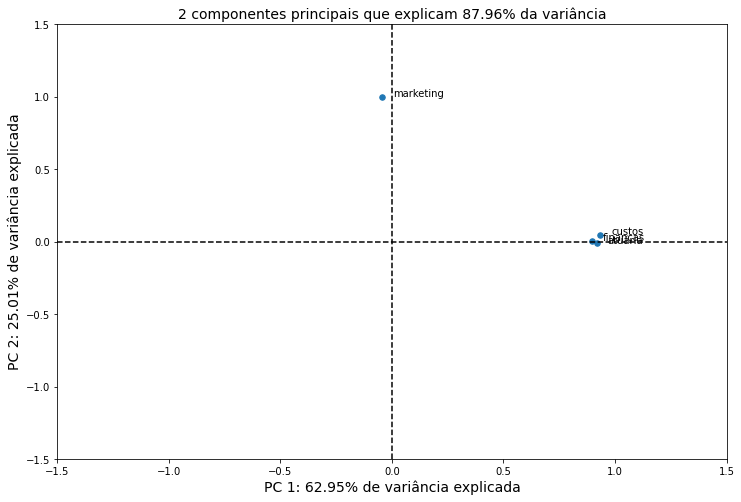

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])
label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 
plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"PC 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"PC 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

Gráfico da variância acumulada dos componentes principais

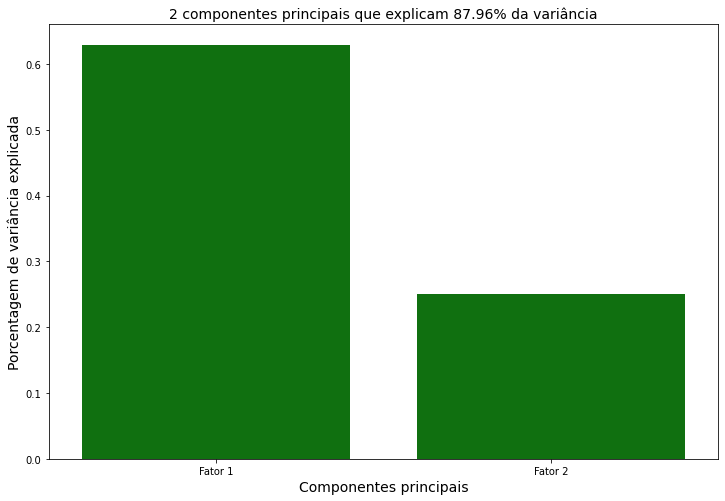

In [31]:

plt.figure(figsize=(12,8))
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, color='green')
plt.xlabel("Componentes principais", fontsize=14)
plt.ylabel("Porcentagem de variância explicada", fontsize=14)
plt.show()